#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario.In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

***The company wants to know:***

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

***Goal:***
- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.
- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

## Step 1 - Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## Step 2 - Data Inspection

In [2]:
# Reading the csv file using pandas
bike_df = pd.read_csv('day.csv')

In [3]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking shape 
bike_df.shape

(730, 16)

In [5]:
# checking info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


#### Observation - 
- It can be observed that there are no null values present in the dataset.

In [6]:
# checking the statistical parameters of dataset.
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# checking the columns
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
# checking the size
bike_df.size

11680

In [9]:
# checking the datatypes
bike_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [10]:
# checking the dimensions
bike_df.ndim

2

## Step 3 - Data Cleaning 

### Dropping the columns which are not useful in analysis
- 'Instant' is just a row identifier so it can be dropped.
- 'dteday' can be dropped as the 'month' , 'year' and 'weekday' columns have the desired data.
- 'casual' and 'registered' variable are correlated with 'cnt' as 'cnt' = ''casual' + 'registered'.Thus, both the variables can    be dropped.
-  As 'atemp' is a feeling temperature and 'temp' is an actual temperature, 'temp' can be dropped.

In [11]:
# Droping instant column 
bike_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday column
bike_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns
bike_df.drop(['casual'], axis = 1, inplace = True)
bike_df.drop(['registered'], axis = 1, inplace = True)

In [12]:
# checking dataset again
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# Dropping temp column
bike_df.drop(['temp'], axis = 1, inplace = True)

In [14]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


In [15]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(3), int64(8)
memory usage: 62.8 KB


In [16]:
# Checking the unique values in all columns
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

## Step 4 - EDA

### Converting season , mnth , weekday , weathersit columns to catagorical datatypes

In [17]:
# Converting season , mnth , weekday , weathersit columns to catagorical datatypes
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                                            7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,11.46350,43.6957,12.522300,1600


### Checking the linear relationship of numerical variables with target variable

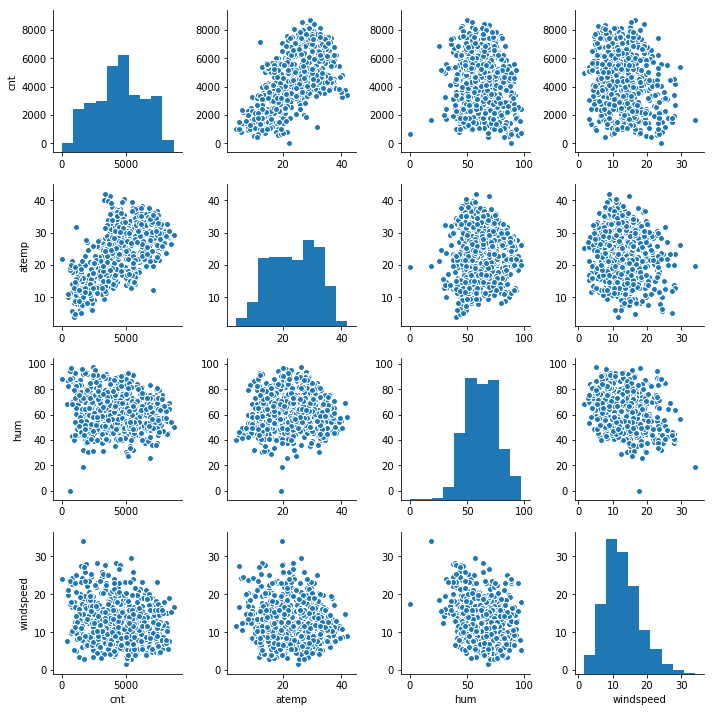

In [18]:
plt.figure(figsize = (10,10))
sns.pairplot(data = bike_df , vars = ['cnt', 'atemp', 'hum','windspeed'])
plt.show()

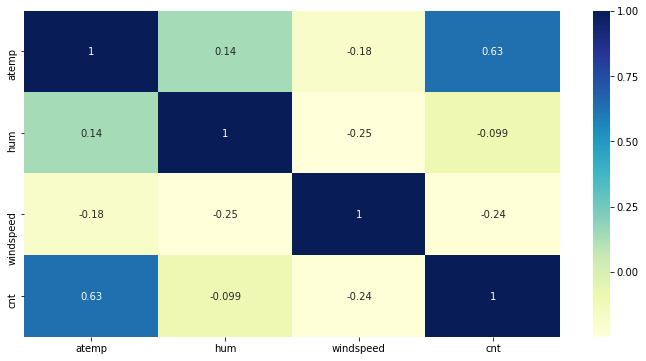

In [19]:
# Checking the correlation between all the variables through heatmap.
plt.figure(figsize=(12,6))
sns.heatmap(bike_df[['atemp','hum','windspeed','cnt']].corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Observations - 
- From above it can be observed that 'atemp' is highly correlated with the target variable 'cnt'. From the graph it can also be observed that target variable 'cnt' is linearly related to some of the independent variables. Thus it's a good sign for building linear model.

### Visualising the dataset to check correlation

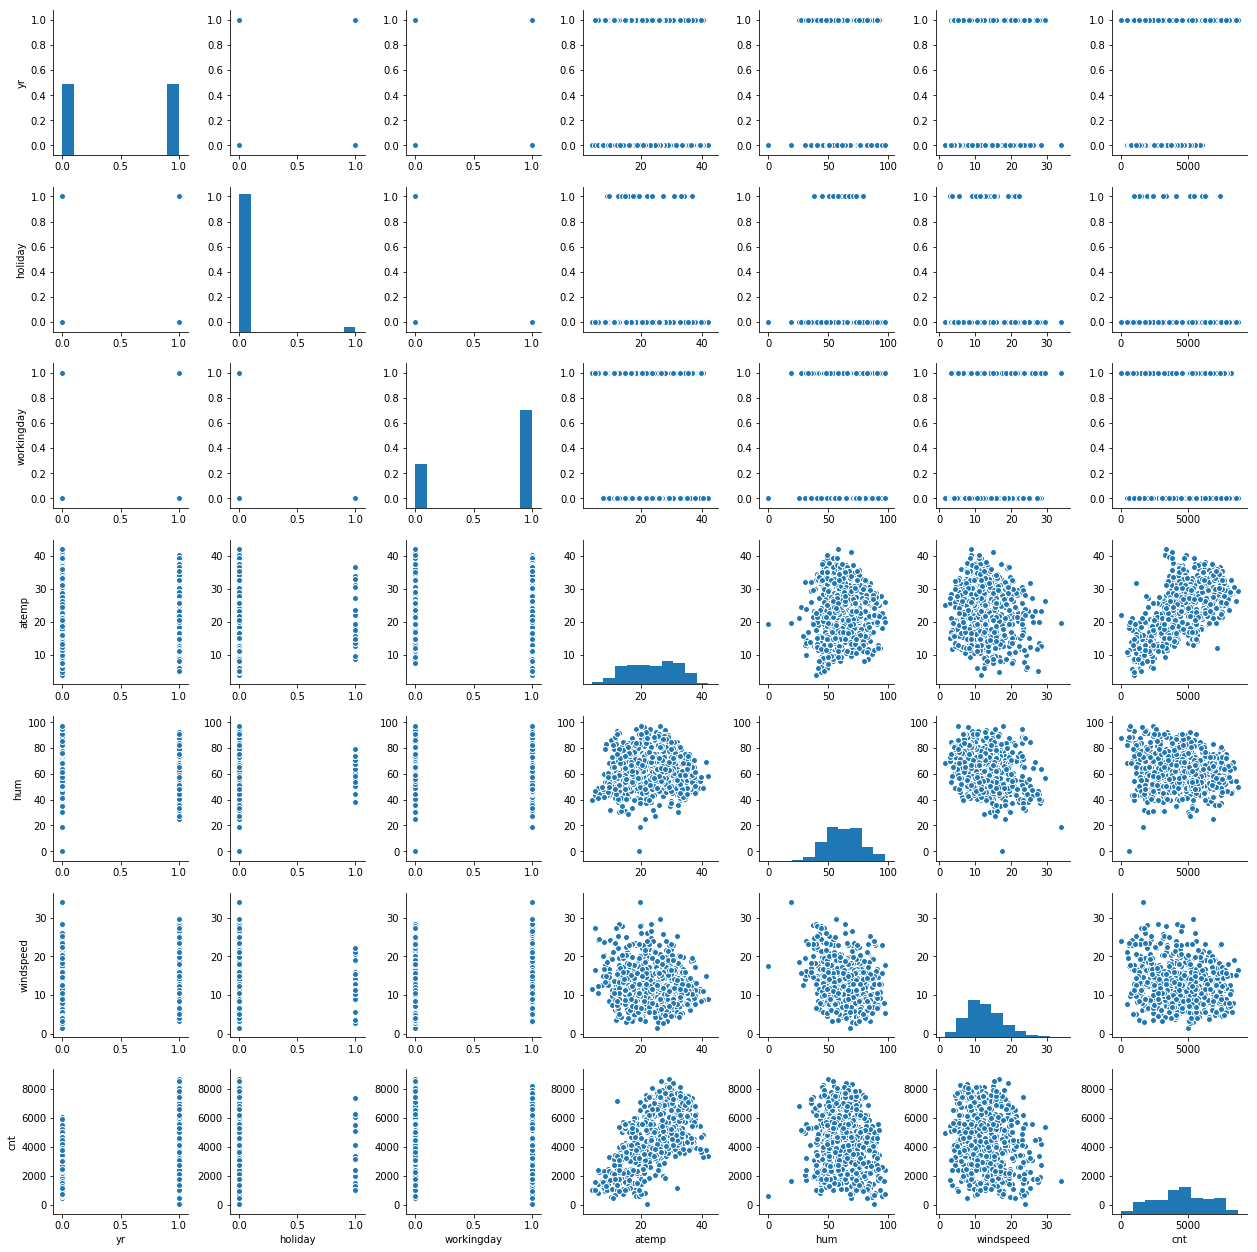

In [20]:
plt.figure(figsize=(20,15))
sns.pairplot(bike_df)
plt.show()

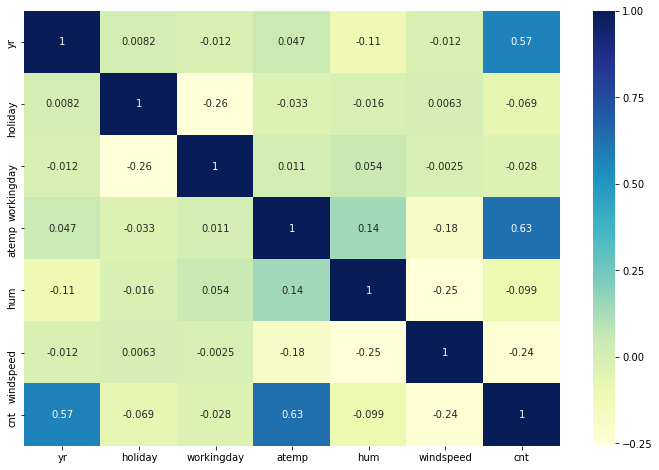

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(bike_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

#### Observations - 
- Holiday , workingday , hum , windspeed have negative correlation with target variable i.e. value of cnt decreases with increase in these variables.

### Analysing Categorical Variables with the Target Variable

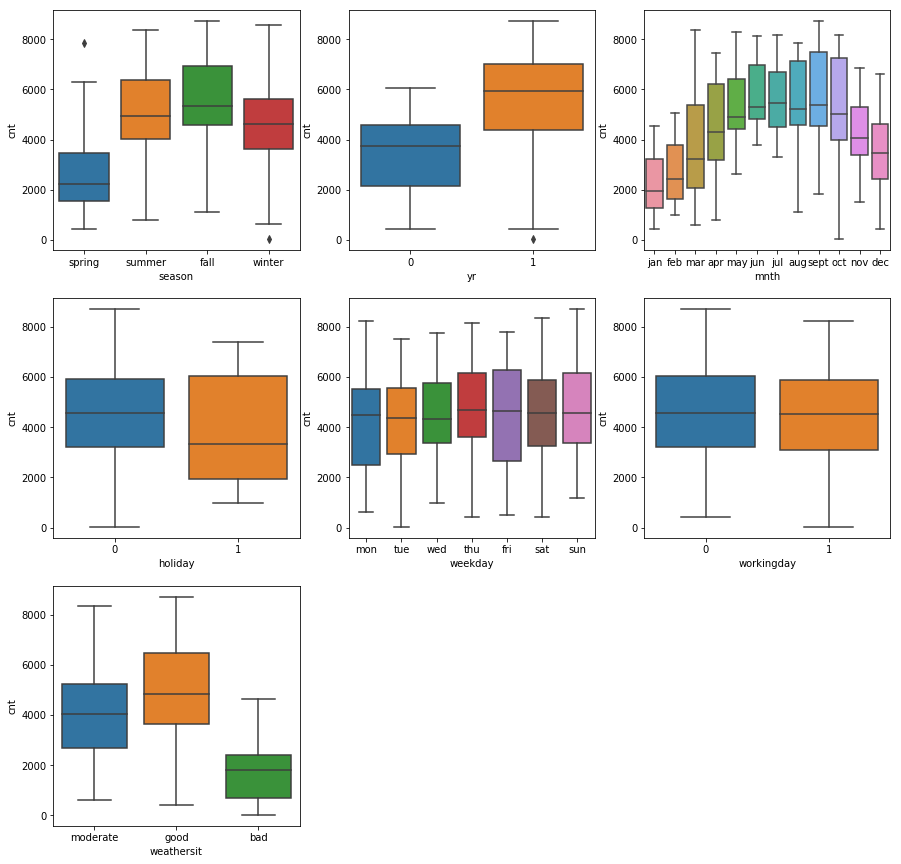

In [22]:
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

####  Observations - 
-   Season - Fall has the highest demand while spring has lowest demand.
-   Year 2019 has higher demand than 2018
-   Demand is consistently growing from January to June. September has highest demand. Demand is less at the end and starting              of the year. This might be due to harsh winter conditions.
-   When their is a holiday , demand reduction observed.
-   Weekday is not giving clear picture about demand.
-   Good weathersit has highest demand.

## Step 5 - Data Preparation for Linear Regression

### Creating dummy variables for the categorical variables.

In [23]:
bike_df = pd.get_dummies(data = bike_df , columns = ['season','mnth','weekday'] , drop_first = True)
bike_df = pd.get_dummies(data = bike_df,columns=["weathersit"])

- Dropping the first column as (k-1) dummies can explain k categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [24]:
# Printing columns after creating dummies
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [25]:
bike_df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Step 6 - Model Building

### Splitting the data for trainig and testing

In [27]:
# Checking the shape
bike_df.shape

(730, 30)

In [29]:
# Target variable will be at y
y = bike_df.pop('cnt')
# Remaining independent variables will be X
X = bike_df
# Train Test split with 70:30 ratio
X_train , X_test , y_train , y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [30]:
# Independent Variable Inspection
X.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,18.18125,80.5833,10.749882,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,10.60610,59.0435,10.739832,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,11.46350,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [31]:
# Checking shape of train and test data
print(X_train.shape)
print(X_test.shape)

(510, 29)
(220, 29)


### Feature Scaling of Continuous Variables

- Scaling will bring continuous variables with high values on par with other variables and also it will make interpretation more easier.
- We will scale atemp , hum and windspeed variables.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [34]:
# Scaling the Continuous Variables
cont_vars = ['atemp','hum','windspeed']
# Scaling with Min-Max Scaler
scaler = MinMaxScaler()
# Fit and Transforming training set
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])

In [35]:
X_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.513156,0.650480,0.320883,0.243137,0.247059,0.247059,0.096078,...,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.625490,0.345098
std,0.500429,0.157763,0.453386,0.212410,0.145846,0.169803,0.429398,0.431725,0.431725,0.294988,...,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.529718,0.653714,0.296763,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_aug,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,0,0.318819,0.751824,0.380981,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


### Automated Elimination using RFE

In [37]:
# Build a linear regression model using RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
# Selecting 15 best features
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=15, step=1, verbose=0)

In [39]:
#Columns selected by RFE 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 6),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', True, 1),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 10),
 ('mnth_jun', False, 8),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 15),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 9),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 13),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

### Manual Elimination

In [40]:
#Function to build a model using statsmodel api 
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [41]:
#Function to calculate VIFs 
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [42]:
# Printing Columns selected by RFE. 
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [44]:
# Considering 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']]

In [45]:
X_train_rfe.shape

(510, 15)

## Models

### Model 1

In [46]:
cols = ['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.25e-186
Time:                        11:44:29   Log-Likelihood:                -4120.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1204.9254    

### Model 2

In [60]:
# Dropping weathersit_good due to high VIF
cols = ['yr', 'holiday', 'atemp','hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.25e-186
Time:                        12:07:54   Log-Likelihood:                -4120.2
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     495   BIC:                             8334.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2449.2962    

### Model 3

In [61]:
# Dropping hum column due to high VIF
cols = ['yr', 'holiday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     191.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.42e-183
Time:                        12:08:30   Log-Likelihood:                -4129.6
No. Observations:                 510   AIC:                             8287.
Df Residuals:                     496   BIC:                             8346.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1724.1975    

### Model 4

In [77]:
# Dropping mnth_dec and mnth_feb and mnth_jan due to high p-value
cols = ['yr', 'holiday', 'atemp', 'windspeed', 'season_summer',
        'season_winter', 'mnth_aug', 'mnth_sept', 'weathersit_bad',
        'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          6.05e-184
Time:                        12:41:59   Log-Likelihood:                -4137.1
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     499   BIC:                             8343.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1130.2281    

#### Observations - 
- In above model , VIF of Independent variable is under 5 which can be considered under control.
- The p-value of all the variables is less than 0.05.
- R-squared and adjusted R-squared values are close to 83% 
- Difference between R-squared and Adjusted R-squared values for this model is very less.
- F-statistic value is High and Prob(F-statistic) value is low.
- Thus we can say above model is significant.

In [66]:
# Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [78]:
# Building the final model using sklearn
cols = ['yr', 'holiday', 'atemp', 'windspeed', 'season_summer',
       'season_winter', 'mnth_aug', 'mnth_sept', 'weathersit_bad',
       'weathersit_moderate']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1130.22806967 [ 2029.02225418  -811.6031365   4667.55404206 -1146.62541049   860.40212696
  1139.75977441   590.53026552  1050.43948131 -2399.16197784  -714.75027226]


## Step 7 - Model Evaluation

In [79]:
y_train_pred = lr.predict(X_train[cols])

In [80]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

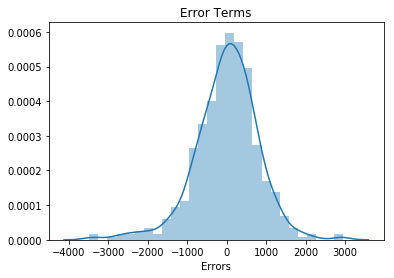

In [81]:
plot_res_dist(y_train, y_train_pred)
plt.show()

#### Observation - Errors are normally distributed with mean 0. Thus,we can proceed.

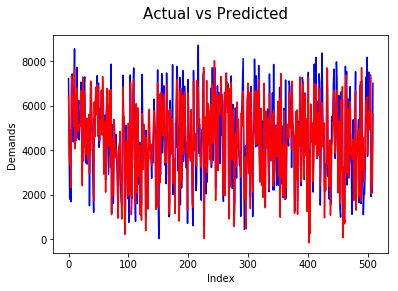

In [82]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Observation -  Actual and Predicted Result follows almost same pattern so this model is fine.

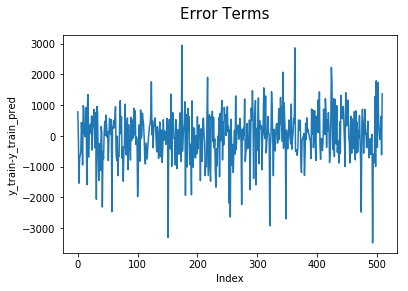

In [83]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Observation - We can observe the error terms are independent of each other.

In [84]:
# Calculating the R-squared Value
r2_score(y_train,y_train_pred)

0.82860637020344963

#### Observation - R-Squared value is same as we obtained in the final model.

### Linearity Check

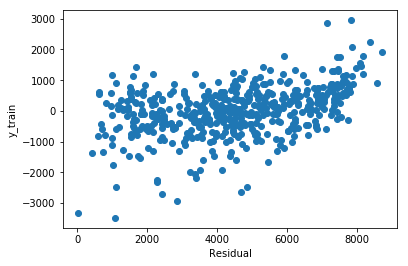

In [85]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### Predicting values for test dataset

In [86]:
# Scaling the Continuous Variables
cont_vars = ['atemp','hum','windspeed']
# Transforming test dataset
X_test[cont_vars] = scaler.transform(X_test[cont_vars])

In [87]:
# Columns from the final model
cols = ['yr', 'holiday', 'atemp', 'windspeed', 'season_summer',
        'season_winter', 'mnth_aug', 'mnth_sept', 'weathersit_bad',
        'weathersit_moderate']

# Predicting the values for test data
y_test_pred = lr.predict(X_test[cols])

###  R-squared value for test predictions.

In [88]:
r2_score(y_test,y_test_pred)

0.79425209298371002

##### Observation - 
- R2 value for predictions on test data (0.794) is very close to 0.8 as R2 value of train data(0.829). This is a good R-squared   value,hence we can see our model is performing good even on unseen data (test data)

### Homoscedacity

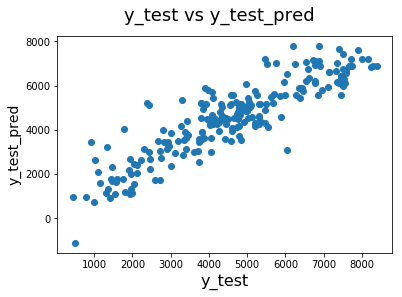

In [91]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 18)               
plt.xlabel('y_test', fontsize = 16)                          
plt.ylabel('y_test_pred', fontsize = 14)
plt.show()

#### Observation - The variance of the residuals is constant across predictions.

### Actual and Predicted test values

In [96]:
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=15)               
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Counts', fontsize=16)                               

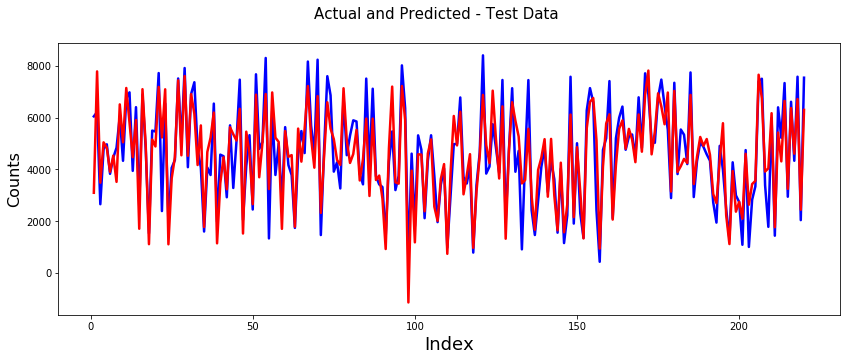

In [97]:
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')
plt.show()

#### Observation - Actual and Predicted result follows similar pattern on test data.

### Plotting Error terms for test data

In [107]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,221,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=15)                # Y-label

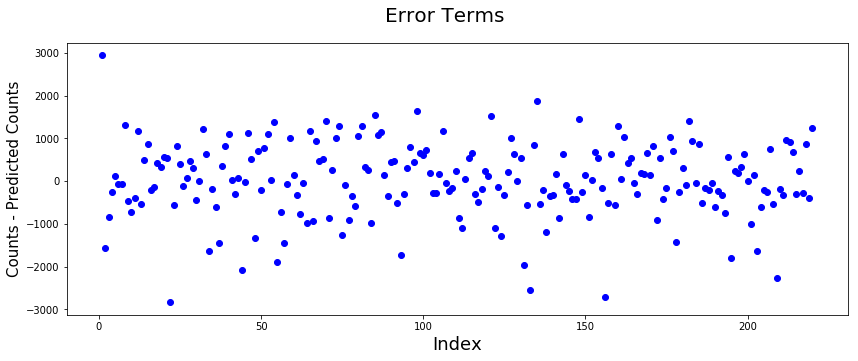

In [108]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)
plt.show()

#### Observation - We can observe error terms are randomly distributed and there is no pattern which means the output is explained well by the     model.

### Model Building With RFE

In [109]:
cols = ['yr', 'holiday', 'atemp', 'windspeed', 'season_summer',
        'season_winter', 'mnth_aug', 'mnth_sept', 'weathersit_bad',
        'weathersit_moderate']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          6.05e-184
Time:                        14:15:53   Log-Likelihood:                -4137.1
No. Observations:                 510   AIC:                             8296.
Df Residuals:                     499   BIC:                             8343.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1130.2281    

## Step 7 - Result and Conclusion

### Result :
- Company should focus to enhance business during spring.
- September has the highest demand , so it is a good month for expansion.
- After analysis of previous years , it is expected that the business will gain momentum once things get normalised.
- Winter months have low demand so discount coupons can be used during this period.
- Demand of bikes is higher during 30-40 degree temperatures.

### Conclusion :
- Significant variables to predict the demand for shared bikes:
 - Year 
 - Holiday 
 - Feeling temperature 
 - Windspeed 
 - Seasons (Summer and Winter) 
 - Months (August and September)
 - Weathersit (Light Snow, Mist + Cloudy)